# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Abdolla Hegazy</p>
### <p style="text-align: right;"> &#9989; recorderlegend</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [4]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Western Europe', 'Southern Europe', 'Ukraine'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Afghanistan', 'Ural'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Middle East', 'Egypt', 'North Africa']
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'Congo', 'East Africa'],
        'Egypt': ['North Africa', 'Southern Europe', 'Middle East', 'East Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Japan', 'Alaska'],
        'Irkutsk': ['Yakutsk', 'Siberia', 'Mongolia', 'Kamchatka'],
        'Mongolia': ['Siberia', 'China', 'Irkutsk', 'Japan'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'China': ['Siberia', 'Mongolia', 'Ural', 'Afghanistan', 'India', 'Siam'],
        'India': ['China', 'Afghanistan', 'Middle East', 'Siam'],
        'Siam': ['China', 'India', 'Indonesia'],
        'Middle East': ['Ukraine', 'Southern Europe', 'Egypt', 'East Africa', 'India', 'Afghanistan']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}

# Display the dictionary to verify its structure
risk_territories


{'North America': {'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
  'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
  'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
  'Alberta': ['Alaska',
   'Northwest Territory',
   'Ontario',
   'Western United States'],
  'Ontario': ['Alberta',
   'Northwest Territory',
   'Greenland',
   'Quebec',
   'Western United States',
   'Eastern United States'],
  'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
  'Western United States': ['Alberta',
   'Ontario',
   'Eastern United States',
   'Central America'],
  'Eastern United States': ['Western United States',
   'Ontario',
   'Quebec',
   'Central America'],
  'Central America': ['Western United States',
   'Eastern United States',
   'Venezuela']},
 'South America': {'Venezuela': ['Central America', 'Brazil', 'Peru'],
  'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
  'Peru': ['Venezuela', 'Brazil', 'Argentina'],
  'Argentina'

### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [7]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.

    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Loop through each continent and its territories
    for continent, territory_data in territories.items():
        for territory, neighbors in territory_data.items():
            # Add the territory as a node with continent as an attribute
            G.add_node(territory, continent=continent)
            
            # Add edges between the territory and its neighboring territories
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G

# Create the graph
G = create_risk_graph(risk_territories)

# Display basic information about the graph
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 42 nodes and 82 edges


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

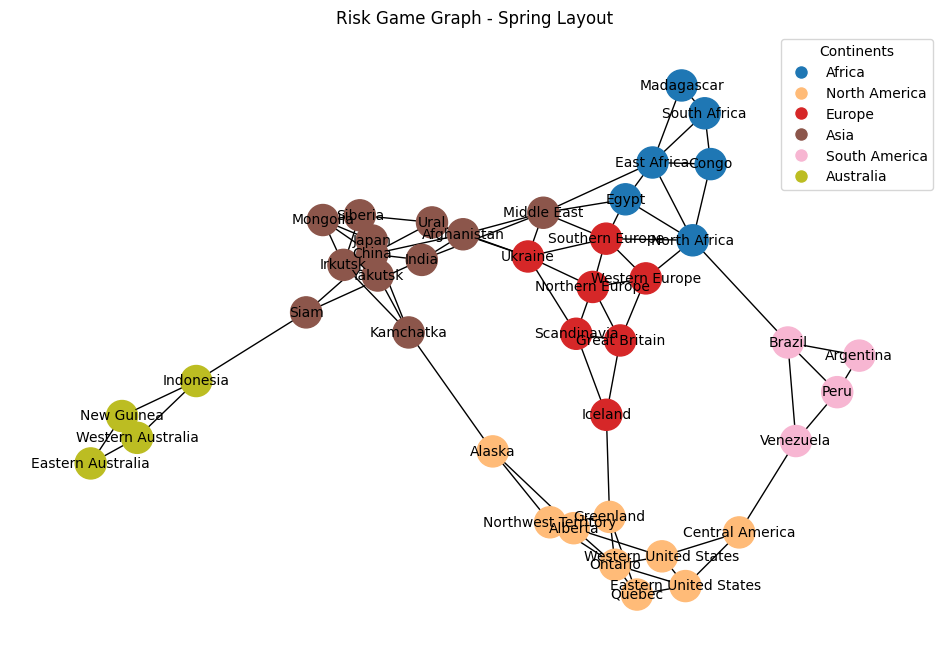

In [9]:
import matplotlib.pyplot as plt

def visualize_risk_graph(G, layout_type='spring'):
    """
    Create a visualization of the Risk board graph with continents colored differently.

    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
        layout_type (str): Type of layout to use for node positioning
                           Options: 'spring', 'circular', 'kamada_kawai', 'random', 'shell'
    """
    # Define available layout options
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout
    }

    # Check if the selected layout is valid
    if layout_type not in layouts:
        raise ValueError(f"Invalid layout type. Choose from {list(layouts.keys())}")

    # Get the node positions using the selected layout
    pos = layouts[layout_type](G)

    # Create a color map based on continents
    continents = nx.get_node_attributes(G, 'continent')
    unique_continents = list(set(continents.values()))
    color_map = {continent: plt.cm.tab20(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}
    node_colors = [color_map[continents[node]] for node in G.nodes()]

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Draw the nodes with increased size and colored by continent
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw the edges
    nx.draw_networkx_edges(G, pos)

    # Draw the labels with increased font size
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    # Create a legend for continents
    legend_labels = {continent: plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[continent], markersize=10) for continent in unique_continents}
    plt.legend(legend_labels.values(), legend_labels.keys(), title="Continents", loc="upper right")

    # Add a title and clean up display
    plt.title(f"Risk Game Graph - {layout_type.capitalize()} Layout")
    plt.axis('off')
    
    # Show the graph
    plt.show()

# Visualize the graph using the spring layout
visualize_risk_graph(G, layout_type='spring')

#THIS IS MADE USING CHAT GPT

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

1. I found that the spring layout provides the best visualization for continent-based clustering. This layout uses a force-directed algorithm that places nodes in positions that minimize the total energy in the system. This naturally groups connected nodes closer together, which aligns well with the way Risk territories are clustered by continent.

2. The Kamada-Kawai layout is a force-directed layout that aims to position nodes so that the graph’s distances resemble their actual graph-theoretic distances. It minimizes an energy function based on the desired pairwise distances between nodes. This layout is particularly effective for visualizing smaller, dense graphs. "Kamada, T., & Kawai, S. (1989). An Algorithm for Drawing General Undirected Graphs. Information Processing Letters."


3.  
continents = nx.get_node_attributes(G, 'continent')
unique_continents = list(set(continents.values()))
color_map = {continent: plt.cm.tab20(i / len(unique_continents)) for i, continent in enumerate(unique_continents)}
node_colors = [color_map[continents[node]] for node in G.nodes()]

4. 
The legend is constructed using plt.Line2D() objects, which act as visual markers for each continent's color.

5. 
I used the tab20 colormap from Matplotlib. This colormap provides 20 distinct colors, making it suitable for multiple continent categories.

6.
The node size and font size were adjusted using the following parameters:
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)

7.
The labels are displayed using the nx.draw_networkx_labels() function.

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University